<a href="https://colab.research.google.com/github/Pavan-pk/Kaggle/blob/main/unsuper_boltzmann_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=dc662356477a4f2aa5920cf9194adb9e3eb18aac812ee29992d3c1bd26e328af
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


## Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


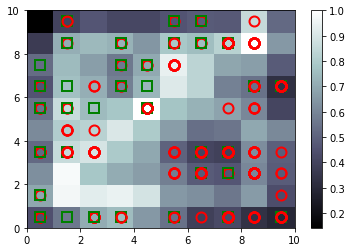

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,5)], mappings[(3,0)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15686461
15684512
15680643
15692137
15668830
15796569
15805212
15712877
15691150
15678210
15573520
15740458
15686885
15664615
15585928
15680895
15807546
15583067
15773869
15796111
15578722
15809800
15623072
15676909
15802071
15790630
15750055
15647898
15679801
15748499
15569682
15587038
15770406
15592773
15732943
15781975
15770255
15773789
15794868
15705506
15812470
15591107
15674583
15588854
15788215
15699294
15722535
15587297
15594133
15591360
15625501
15569595
15665181


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [ ]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

## Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 20)

Epoch 1/20
690/690 [==============================] - 1s 1ms/step - loss: 0.6418 - accuracy: 0.7072
Epoch 2/20
690/690 [==============================] - 1s 1ms/step - loss: 0.4943 - accuracy: 0.8812
Epoch 3/20
690/690 [==============================] - 1s 1ms/step - loss: 0.4165 - accuracy: 0.9130
Epoch 4/20
690/690 [==============================] - 1s 1ms/step - loss: 0.3736 - accuracy: 0.9174
Epoch 5/20
690/690 [==============================] - 1s 1ms/step - loss: 0.3470 - accuracy: 0.9188
Epoch 6/20
690/690 [==============================] - 1s 1ms/step - loss: 0.3287 - accuracy: 0.9217
Epoch 7/20
690/690 [==============================] - 1s 1ms/step - loss: 0.3150 - accuracy: 0.9217
Epoch 8/20
690/690 [==============================] - 1s 1ms/step - loss: 0.3045 - accuracy: 0.9217
Epoch 9/20
690/690 [==============================] - 1s 1ms/step - loss: 0.2959 - accuracy: 0.9217
Epoch 10/20
690/690 [==============================] - 1s 1ms/step - loss: 0.2885 - accuracy: 0.9217

## Predicting test set results

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
#sorting according to prob_pred
y_pred = y_pred[y_pred[:, 1].argsort()]

In [ ]:
print(y_pred)

[[1.57224790e+07 9.42138135e-02]
 [1.55777710e+07 9.42138135e-02]
 [1.57440440e+07 9.42138135e-02]
 ...
 [1.55735200e+07 6.17362142e-01]
 [1.56864610e+07 6.25870526e-01]
 [1.56214230e+07 8.77777576e-01]]
